<a href="https://colab.research.google.com/github/felipmorais/ml_pipeline/blob/main/analise_censo_documentado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base de dados do censo

* Fonte: https://archive.ics.uci.edu/dataset/2/adult

In [3]:
# importando bibliotecas necessárias para leitura, análise e visualização dos dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Importação e exploração dos dados

In [4]:
# importação do dataset do censo
census_data = pd.read_csv('/content/census.csv')
census_data

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [5]:
census_data.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
census_data.shape

(32561, 15)

In [7]:
census_data.dtypes

age                int64
workclass         object
final-weight       int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loos       int64
hour-per-week      int64
native-country    object
income            object
dtype: object

In [8]:
# apresentação de dados estatístisticos dos atributos numéricos
census_data.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [9]:
# verificação de dados faltantes
census_data.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

# Visualização de dados

In [10]:
# apresenta os rótulos distintos da classe (atributo alvo) e o total de registros de cada classe
np.unique(census_data['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

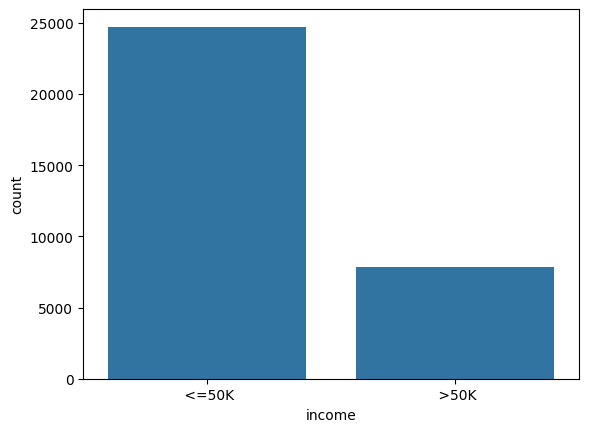

In [11]:
# apresenta a distribuição dos dados da classe
sns.countplot(x=census_data['income']);

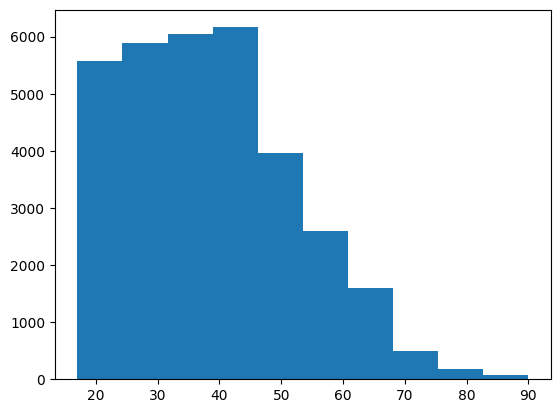

In [12]:
# exibe a distribuição pelo histograma da idade
plt.hist(x=census_data['age']);

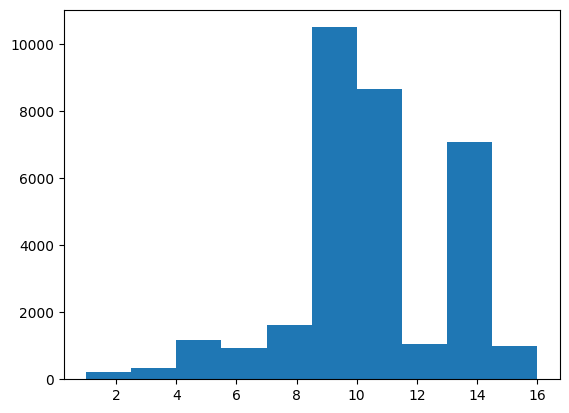

In [13]:
# exibe a distribuição pelo histograma do número de anos investidos em educação
plt.hist(x=census_data['education-num']);

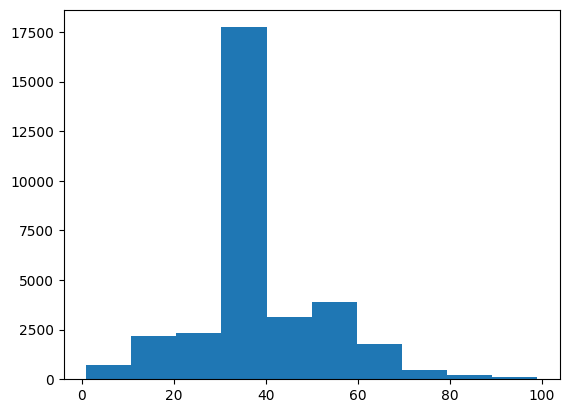

In [14]:
# exibe a distribuição pelo histograma da quantidade de horas trabalhadas por semana
plt.hist(x=census_data['hour-per-week']);

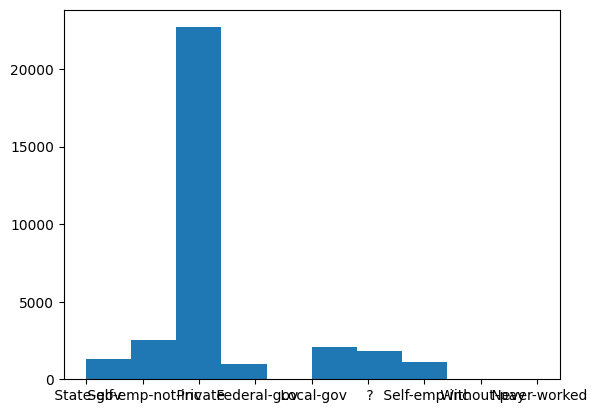

In [15]:
# exibe a distribuição pelo histograma da quantidade de registros em cada workclass
plt.hist(x=census_data['workclass']);

In [16]:
# exibe um mapa em forma de árvore (maiores quantidades ficam no canto esquerdo superior e menores valores no canto direito inferior)
# pode-se utilizar vários atributos para subdividir o mapa
graph = px.treemap(census_data, path=['workclass', 'age'])
graph.show()

In [17]:
# exibe um mapa em forma de árvore (maiores quantidades ficam no canto esquerdo superior e menores valores no canto direito inferior)
# pode-se utilizar vários atributos para subdividir o mapa
graph = px.treemap(census_data, path=['education', 'income'])
graph.show()

In [18]:
# exibe as categorias/atributos de forma paralela,
# considerando a ligação de cada um dos dados categóricos dos atributos considerados como dimensões
graph = px.parallel_categories(census_data, dimensions=['occupation', 'relationship'])
graph.show()

In [19]:
# exibe as categorias/atributos de forma paralela,
# considerando a ligação de cada um dos dados categóricos dos atributos considerados como dimensões
graph = px.parallel_categories(census_data, dimensions=['occupation', 'education', 'income'])
graph.show()

In [20]:
# exibe as categorias/atributos de forma paralela,
# considerando a ligação de cada um dos dados categóricos dos atributos considerados como dimensões
graph = px.parallel_categories(census_data, dimensions=['education', 'income'])
graph.show()

In [21]:
# cria uma matriz de dispersão utilizando diferentes dimensões e utilizando a cor para separar as classes do atributo alvo
graph = px.scatter_matrix(census_data, dimensions=['age', 'hour-per-week', 'final-weight'], color='income')
graph.show()

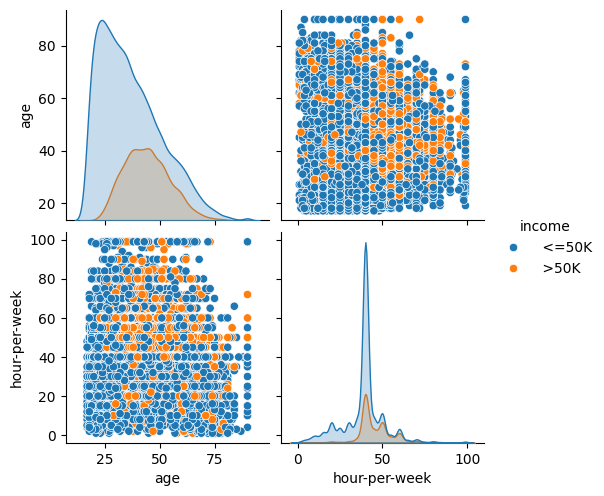

In [22]:
sns.pairplot(census_data[['age', 'workclass', 'hour-per-week', 'income']], hue='income')

# Divisão entre previsores e classe

In [23]:
# retorna todas as colunas do dataframe
census_data.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [24]:
# seleciona todas linhas e as colunas de indices 0 ao 13, exceto a coluna 14, que representa nossa classe
# o .values converte o resultado do filtro em matriz
X_census = census_data.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [25]:
# seleciona somente a coluna 14, que define a classe/alvo
# o .values converte o resultado do filtro em matriz
y_census = census_data.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# Tratamento dos atributos categóricos

LabelEncoder

In [26]:
# retorna todas as colunas do dataframe
census_data.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [27]:
# retorna todas as linhs somente da coluna de indice 1 do X_census
X_census[:, 1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [28]:
# retorna todos os valores unicos dentro da coluna workclass
census_data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [29]:
# importa o LabelEncoder do sklearn
from sklearn.preprocessing import LabelEncoder

# instancia um objeto LabelEncoder
label_encoder = LabelEncoder()
# e calcula um dicionário que irá definir um valor numérico para cada valor categórico da coluna
workclass_encoded = label_encoder.fit_transform(X_census[:, 1])
workclass_encoded

array([7, 6, 4, ..., 4, 4, 5])

In [30]:
# esse código tem a mesma ideia de cima, a diferença é que este utiliza a substituição de valores direto no dataframe e não na matriz

from sklearn.preprocessing import LabelEncoder

census_data2 = census_data
label_encoder2 = LabelEncoder()
census_data2['workclass'] = label_encoder2.fit_transform(census_data2['workclass'])
census_data2

age  workclass  final-weight    education  education-num  \
0       39          7         77516    Bachelors             13   
1       50          6         83311    Bachelors             13   
2       38          4        215646      HS-grad              9   
3       53          4        234721         11th              7   
4       28          4        338409    Bachelors             13   
...    ...        ...           ...          ...            ...   
32556   27          4        257302   Assoc-acdm             12   
32557   40          4        154374      HS-grad              9   
32558   58          4        151910      HS-grad              9   
32559   22          4        201490      HS-grad              9   
32560   52          5        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [31]:
# exemplo de codificação utilizando o LabelEncoder para todas as colunas categóricas
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_ocupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

X_census[:, 1] = label_encoder_workclass.fit_transform(X_census[:, 1])
X_census[:, 3] = label_encoder_education.fit_transform(X_census[:, 3])
X_census[:, 5] = label_encoder_marital.fit_transform(X_census[:, 5])
X_census[:, 6] = label_encoder_ocupation.fit_transform(X_census[:, 6])
X_census[:, 7] = label_encoder_relationship.fit_transform(X_census[:, 7])
X_census[:, 8] = label_encoder_race.fit_transform(X_census[:, 8])
X_census[:, 9] = label_encoder_sex.fit_transform(X_census[:, 9])
X_census[:, 13] = label_encoder_country.fit_transform(X_census[:, 13])

OneHotEncoder

In [32]:
# retorna todos os valores unicos dentro da coluna workclass
census_data['workclass'].unique()

array([7, 6, 4, 1, 2, 0, 5, 8, 3])

In [33]:
# conta o tamanho do retorno de todos os valores unicos dentro da coluna workclass
len(census_data['workclass'].unique())

9

In [34]:
census_data

age  workclass  final-weight    education  education-num  \
0       39          7         77516    Bachelors             13   
1       50          6         83311    Bachelors             13   
2       38          4        215646      HS-grad              9   
3       53          4        234721         11th              7   
4       28          4        338409    Bachelors             13   
...    ...        ...           ...          ...            ...   
32556   27          4        257302   Assoc-acdm             12   
32557   40          4        154374      HS-grad              9   
32558   58          4        151910      HS-grad              9   
32559   22          4        201490      HS-grad              9   
32560   52          5        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [35]:
# calcula as colunas do one hot encoder para os valores da coluna workclass, utilizando wc como prefixo em cada coluna nova
pd.get_dummies(census_data['workclass'], prefix='wc')

wc_0   wc_1   wc_2   wc_3   wc_4   wc_5   wc_6   wc_7   wc_8
0      False  False  False  False  False  False  False   True  False
1      False  False  False  False  False  False   True  False  False
2      False  False  False  False   True  False  False  False  False
3      False  False  False  False   True  False  False  False  False
4      False  False  False  False   True  False  False  False  False
...      ...    ...    ...    ...    ...    ...    ...    ...    ...
32556  False  False  False  False   True  False  False  False  False
32557  False  False  False  False   True  False  False  False  False
32558  False  False  False  False   True  False  False  False  False
32559  False  False  False  False   True  False  False  False  False
32560  False  False  False  False  False   True  False  False  False

[32561 rows x 9 columns]

In [36]:
census_data

age  workclass  final-weight    education  education-num  \
0       39          7         77516    Bachelors             13   
1       50          6         83311    Bachelors             13   
2       38          4        215646      HS-grad              9   
3       53          4        234721         11th              7   
4       28          4        338409    Bachelors             13   
...    ...        ...           ...          ...            ...   
32556   27          4        257302   Assoc-acdm             12   
32557   40          4        154374      HS-grad              9   
32558   58          4        151910      HS-grad              9   
32559   22          4        201490      HS-grad              9   
32560   52          5        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [37]:
# automatiza o processo de criação das colunas utilizando o one hot encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# dessa vez estamos utilizando o ColumnTransformer que vai realizar a operação definida, nas colunas informadas
one_hot_encoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
# depois, só aplicar o fit_transforme nos dados que queremos transformar e transformar em matriz no final
X_census = one_hot_encoder_census.fit_transform(X_census).toarray()

In [38]:
# exibe os valores da primeira linha da matriz
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [39]:
# exibe o novo formato da matriz, que antes tinha 15 colunas e agora tem 108, devido ao one hot encoder
X_census.shape

(32561, 108)

# Escalonamento dos valores

In [40]:
# realizamos o escalonamento dos valores, conforme fizemos no dataset 1
from sklearn.preprocessing import StandardScaler

scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)
X_census

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

# Divisão das bases em treino e teste

In [41]:
# dividimos o dataset em conjuntos de treino e teste
from sklearn.model_selection import train_test_split

# como já haviamos dividido o dataset em X (previsores) e y (classe),
# agora teremos a mesma subdivisão só com conjuntos de treino e teste para cada caso
X_census_treino, X_census_teste, y_census_treino, y_census_teste = train_test_split(X_census, y_census, test_size=0.2, random_state=0)

In [42]:
# notem que o tamanho do dataset (linhas) tem que ser igual para os conjuntos de treino X e y
X_census_treino.shape, y_census_treino.shape

((26048, 108), (26048,))

In [43]:
# e para os conjuntos de teste X e y
X_census_teste.shape, y_census_teste.shape

((6513, 108), (6513,))

# Divisão das bases em treino, teste e validação

In [44]:
from sklearn.model_selection import train_test_split

# como já haviamos dividido o dataset em X (previsores) e y (classe),
# agora teremos a mesma subdivisão só com conjuntos de treino e um conjunto temporário, como se fosso todo o restante que não for treino
X_train, X_temp, y_train, y_temp = train_test_split(X_census, y_census, test_size=0.2)
# depois, pegamos o conjunto temporário, que possui 20% do tamanho total do dataset
# e subdivimos na metade, representando 10% para o conjunto de validação e 10% para o conjunto de teste
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [45]:
# aqui podemos ver os tamanhos de cada um dos 6 datasets (3 subdivisões divididas em dados X e y)
X_train.shape, y_train.shape, X_test.shape,  y_test.shape, X_val.shape, y_val.shape

((26048, 108), (26048,), (3257, 108), (3257,), (3256, 108), (3256,))

In [46]:
# podemos calcular os valores únicos dos rótulos de cada dataset
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True), np.unique(y_val, return_counts=True)

((array([' <=50K', ' >50K'], dtype=object), array([19763,  6285])),
 (array([' <=50K', ' >50K'], dtype=object), array([2481,  776])),
 (array([' <=50K', ' >50K'], dtype=object), array([2476,  780])))

In [47]:
from sklearn.model_selection import train_test_split

# agora realizamos a mesma divisão de dados que fizemos para treino, teste e validação
# a diferença é que agora estamos utilizando a divisão estratificada de dados.
X_train, X_temp, y_train, y_temp = train_test_split(X_census, y_census, test_size=0.2, stratify=y_census)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

In [48]:
# aqui podemos ver os tamanhos de cada um dos 6 datasets (3 subdivisões divididas em dados X e y)
X_train.shape, y_train.shape, X_test.shape,  y_test.shape, X_val.shape, y_val.shape

((26048, 108), (26048,), (3257, 108), (3257,), (3256, 108), (3256,))

In [49]:
# podemos calcular os valores únicos dos rótulos de cada dataset
# agora notamos que os rótulos dos conjuntos de treino e teste estão igualmente distribuidos
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True), np.unique(y_val, return_counts=True)

((array([' <=50K', ' >50K'], dtype=object), array([19775,  6273])),
 (array([' <=50K', ' >50K'], dtype=object), array([2473,  784])),
 (array([' <=50K', ' >50K'], dtype=object), array([2472,  784])))

# Exemplo de classificador baseado em árvore de decisão

Para o exemplo abaixo, consideramos a divisão em apenas treino e teste.

In [50]:
from sklearn.tree import DecisionTreeClassifier

# utilizamos o modelo de árvore de decisão do sklearn como classificador
model = DecisionTreeClassifier(max_depth=5)
# treinamos o modelo utilizando o dataset de treino
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [51]:
# depois de treinar o modelo de classificação, realizamos as predições dos dados de teste
predicted = model.predict(X_test)
predicted

array([' >50K', ' >50K', ' <=50K', ..., ' >50K', ' >50K', ' <=50K'],
      dtype=object)

In [52]:
from sklearn.metrics import accuracy_score

# depois, realizamos a comparação dos dados da previsão com os dados reais de teste
accuracy = accuracy_score(predicted, y_test)
accuracy

0.8526251151366288

[Text(0.46153846153846156, 0.9166666666666666, 'x[27] <= 0.08\ngini = 0.366\nsamples = 26048\nvalue = [19775, 6273]'),
 Text(0.23076923076923078, 0.75, 'x[105] <= 0.812\ngini = 0.121\nsamples = 14049\nvalue = [13141, 908]'),
 Text(0.34615384615384615, 0.8333333333333333, 'True  '),
 Text(0.15384615384615385, 0.5833333333333334, 'x[104] <= 1.329\ngini = 0.094\nsamples = 13815\nvalue = [13132, 683]'),
 Text(0.07692307692307693, 0.4166666666666667, 'x[106] <= 5.289\ngini = 0.072\nsamples = 13072\nvalue = [12580.0, 492.0]'),
 Text(0.038461538461538464, 0.25, 'x[107] <= 0.329\ngini = 0.068\nsamples = 13005\nvalue = [12550, 455]'),
 Text(0.019230769230769232, 0.08333333333333333, 'gini = 0.04\nsamples = 10632\nvalue = [10413, 219]'),
 Text(0.057692307692307696, 0.08333333333333333, 'gini = 0.179\nsamples = 2373\nvalue = [2137, 236]'),
 Text(0.11538461538461539, 0.25, 'x[106] <= 8.081\ngini = 0.495\nsamples = 67\nvalue = [30, 37]'),
 Text(0.09615384615384616, 0.08333333333333333, 'gini = 0.47

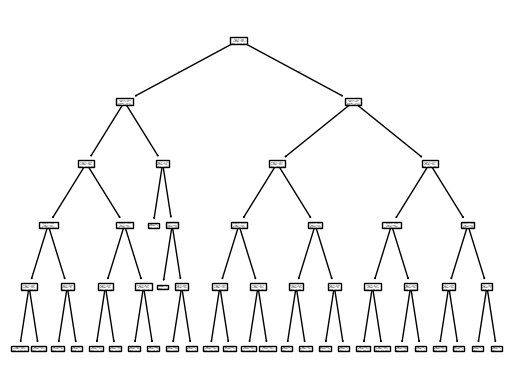

In [53]:
from sklearn import tree

# como o modelo de classificação é baseado em árvores de decisão, podemos ver o resultado do modelo
tree.plot_tree(model)

# Exemplo de classificação com cross-validation

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# criamos o classificador baseado em árvore de decisão
model = DecisionTreeClassifier(max_depth=3, random_state=0)
# definimos a cross validação com 5-folds - 5-fold cross-validation
# nesse caso utilizamos o dataset inteiro, pois a cross validação vai separar entre treino e teste
scores = cross_val_score(model, X_census, y_census, cv=5)
scores #os resultados são referentes a cada split

array([0.83816981, 0.8404484 , 0.84520885, 0.84981572, 0.84551597])

In [55]:
# para calcular o resultado médio de treinamento e validação, calculamos a média e o desvio padrão
scores.mean(), scores.std()

(np.float64(0.8438317515413324), np.float64(0.00409989020901997))